# 📊 客戶分群分析報告
# Customer Segmentation Analysis Report

---

## 📋 執行摘要 Executive Summary

本報告基於 **RFM 分析模型**（Recency, Frequency, Monetary）對電商客戶進行分群分析，旨在：

- 🎯 **識別高價值客戶群體**，制定差異化行銷策略
- 📈 **分析客戶行為模式**，優化客戶體驗
- 💰 **提升客戶終身價值**，增加營收貢獻
- ⚠️ **預防客戶流失**，降低獲客成本

### 🔬 分析方法論 Methodology

**RFM 模型**是客戶價值分析的經典框架：

- **R (Recency)**: 最近一次購買距今天數 - 衡量客戶活躍度
- **F (Frequency)**: 購買頻率 - 衡量客戶忠誠度  
- **M (Monetary)**: 購買金額 - 衡量客戶價值

透過這三個維度的組合，我們可以將客戶分為不同群體，並針對每個群體制定精準的行銷策略。

## 🛠️ 環境設置與配置
## Environment Setup & Configuration

In [15]:
# 設置 Jupyter 顯示選項
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 導入必要的套件
import sys
import warnings
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# 忽略警告訊息
warnings.filterwarnings('ignore')

# 設置 pandas 顯示選項
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print("📦 基礎套件載入完成 Basic packages loaded")

📦 基礎套件載入完成 Basic packages loaded


In [16]:
# 添加專案路徑並導入客戶分群分析系統
project_root = Path().absolute().parent
sys.path.insert(0, str(project_root / "src"))

# 設置中文字體支援
exec(open('../notebooks/font_setup.py').read())

# 導入客戶分群分析系統
from customer_segmentation import CustomerSegmentationPipeline
from customer_segmentation.utils.config import get_config
from customer_segmentation.utils.logger import get_logger
from customer_segmentation.visualization.visualizer import DataVisualizer

# 初始化系統
config = get_config()
logger = get_logger(__name__)

print("✅ 客戶分群分析系統載入完成 Customer Segmentation System loaded")
print(f"📊 系統版本 System Version: {config.version}")
print(f"📅 分析日期 Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

✅ 中文字體配置完成！Chinese font setup completed!
📊 現在可以正常顯示中文圖表了 Chinese charts should now display correctly
✅ 客戶分群分析系統載入完成 Customer Segmentation System loaded
📊 系統版本 System Version: 1.0.0
📅 分析日期 Analysis Date: 2025-05-31 20:43:29


## 📂 資料載入與初步探索
## Data Loading & Initial Exploration

### 📊 資料集概述 Dataset Overview

本分析使用的是電商交易資料集，包含以下關鍵欄位：

| 欄位名稱 | 說明 | 資料類型 |
|---------|------|----------|
| InvoiceNo | 發票編號 | String |
| StockCode | 商品代碼 | String |
| Description | 商品描述 | String |
| Quantity | 購買數量 | Integer |
| InvoiceDate | 交易日期 | Datetime |
| UnitPrice | 單價 | Float |
| CustomerID | 客戶ID | String |
| Country | 國家 | String |

In [17]:
# 建立分析管道
pipeline = CustomerSegmentationPipeline()

# 載入資料
data_file = project_root / "data" / "raw" / "data.csv"

if data_file.exists():
    print(f"📂 載入資料檔案 Loading data file: {data_file.name}")
    print(f"📏 檔案大小 File size: {data_file.stat().st_size / 1024 / 1024:.1f} MB")
    
    raw_data = pipeline.load_data(data_file)
    
    print(f"\n📊 資料載入完成 Data loaded successfully")
    print(f"📈 資料維度 Data shape: {raw_data.shape[0]:,} 筆交易記錄, {raw_data.shape[1]} 個欄位")
    
else:
    print(f"❌ 資料檔案不存在 Data file not found: {data_file}")
    print("請將資料檔案放入 data/raw/ 目錄中")

[32m2025-05-31 20:43:29[0m | [1mINFO    [0m | [36mcustomer_segmentation.pipeline[0m:[36m__init__[0m:[36m52[0m |
[1m🔧 客戶分群分析管道初始化完成 Pipeline initialized[0m

📂 載入資料檔案 Loading data file: data.csv
📏 檔案大小 File size: 43.5 MB


[32m2025-05-31 20:43:29[0m | [1mINFO    [0m | [36mcustomer_segmentation.utils.logger[0m:[36mwrapper[0m:[36m143[0m |
[1m開始執行 Starting execution: load_data[0m

[32m2025-05-31 20:43:29[0m | [1mINFO    [0m | [36mcustomer_segmentation.pipeline[0m:[36mload_data[0m:[36m65[0m |
[1m📂 載入資料 Loading data from: /home/jimmy/AI_business_class/E-Commerce/data/raw/data.csv[0m

🔄 載入資料中... Loading data from /home/jimmy/AI_business_class/E-Commerce/data/raw/data.csv
❌ UTF-8 編碼失敗，嘗試 latin-1 編碼...
✅ 使用 latin-1 編碼載入成功！
✅ 所有必要欄位都存在 All required columns present


[32m2025-05-31 20:43:29[0m | [1mINFO    [0m | [36mcustomer_segmentation.pipeline[0m:[36mload_data[0m:[36m79[0m |
[1m✅ 資料載入完成 Data loaded: (541909, 8)[0m

[32m2025-05-31 20:43:29[0m | [1mINFO    [0m | [36mcustomer_segmentation.utils.logger[0m:[36mwrapper[0m:[36m148[0m |
[1m執行完成 Execution completed: load_data (耗時 Time: 0.26s)[0m


📊 資料載入完成 Data loaded successfully
📈 資料維度 Data shape: 541,909 筆交易記錄, 8 個欄位


In [18]:
# 資料基本資訊
print("📋 資料基本資訊 Basic Data Information")
print("=" * 50)

# 顯示資料結構
print("\n🔍 資料結構 Data Structure:")
display(raw_data.info())

print("\n📊 數值欄位統計 Numerical Statistics:")
display(raw_data.describe())

print("\n👀 資料預覽 Data Preview:")
display(raw_data.head(10))

📋 資料基本資訊 Basic Data Information

🔍 資料結構 Data Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


None


📊 數值欄位統計 Numerical Statistics:


Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


👀 資料預覽 Data Preview:


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
5  12/1/2010 8:26       7.65     17850.0  United Kingdom  
6  12/1/2010 8:26       4.25     17850.0  United Kingdom  
7  12/1/2010 8:28       1.85     17850.0  United Kingdom  
8  12/1/2010 8:28       1.85     17850.0  United Kingdom  
9  12/1/2010 8:34       1.69     13047.0  United Kingdom

## 🧹 資料清理與預處理
## Data Cleaning & Preprocessing

### 🎯 清理策略 Cleaning Strategy

為確保分析品質，我們將執行以下清理步驟：

1. **📅 日期格式標準化** - 確保日期欄位格式一致
2. **❌ 移除取消交易** - 排除負數量或退貨記錄
3. **🚫 處理無效記錄** - 移除價格為零或負數的記錄
4. **👤 處理缺失客戶ID** - 移除無法識別的客戶記錄
5. **💰 計算交易金額** - 建立總價欄位 (數量 × 單價)
6. **🔄 去除重複記錄** - 確保資料唯一性

In [19]:
# 執行資料清理
print("🧹 開始資料清理流程 Starting data cleaning process")
print("=" * 60)

cleaned_data = pipeline.clean_data(remove_outliers=False)

# 顯示清理摘要
cleaning_summary = pipeline.cleaner.get_cleaning_summary()

print("\n📊 清理結果摘要 Cleaning Summary:")
print(f"   原始記錄數 Original records: {cleaning_summary['original_count']:,}")
print(f"   最終記錄數 Final records: {cleaning_summary['final_count']:,}")
print(f"   保留比例 Retention rate: {cleaning_summary['retention_rate']:.1f}%")
print(f"   移除記錄數 Removed records: {cleaning_summary['original_count'] - cleaning_summary['final_count']:,}")

🧹 開始資料清理流程 Starting data cleaning process


[32m2025-05-31 20:43:29[0m | [1mINFO    [0m | [36mcustomer_segmentation.utils.logger[0m:[36mwrapper[0m:[36m143[0m |
[1m開始執行 Starting execution: clean_data[0m

[32m2025-05-31 20:43:29[0m | [1mINFO    [0m | [36mcustomer_segmentation.pipeline[0m:[36mclean_data[0m:[36m96[0m |
[1m🧹 開始資料清理 Starting data cleaning[0m

🧹 開始完整資料清理流程 Starting complete data cleaning process...
📅 轉換日期格式 Converting date format for InvoiceDate...
✅ 日期轉換完成 Date conversion completed
日期範圍 Date range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00
❌ 移除取消交易 Removing cancelled transactions...
移除取消交易 Removed cancelled transactions: 9,288
剩餘資料 Remaining data: 532,621
🚫 移除無效記錄 Removing invalid records...
移除無效記錄 Removed invalid records: 2,517
剩餘資料 Remaining data: 530,104
👤 處理缺失的客戶ID Handling missing CustomerID...
缺失客戶ID記錄 Missing CustomerID records: 132,220
移除缺失客戶ID記錄 Removed missing CustomerID records: 132,220
剩餘資料 Remaining data: 397,884
💰 建立總價欄位 Creating total price column...
✅ 總價欄位建立完成 Total price column created
總價範圍 Total price range: $0.00 to $168469.60
🔄 移除重複記錄 Removing duplicate records...
移除重複記錄 Removed duplicate records: 5,192
最終資料筆數 Final data count: 392,692


[32m2025-05-31 20:43:29[0m | [1mINFO    [0m | [36mcustomer_segmentation.pipeline[0m:[36mclean_data[0m:[36m103[0m |
[1m✅ 資料清理完成 Data cleaning completed: 392,692 records (72.5% retained)[0m

[32m2025-05-31 20:43:29[0m | [1mINFO    [0m | [36mcustomer_segmentation.utils.logger[0m:[36mwrapper[0m:[36m148[0m |
[1m執行完成 Execution completed: clean_data (耗時 Time: 0.23s)[0m


📊 清理結果摘要 Cleaning Summary:
   原始記錄數 Original records: 541,909
   最終記錄數 Final records: 392,692
   保留比例 Retention rate: 72.5%
   移除記錄數 Removed records: 149,217


## 🎯 RFM 分析
## RFM Analysis

### 📚 RFM 理論基礎 RFM Theoretical Foundation

RFM 分析是客戶關係管理中的重要工具，由三個關鍵指標組成：

#### 🕐 Recency (近期性)
- **定義**: 客戶最後一次購買距今的天數
- **商業意義**: 反映客戶的活躍程度和購買意願
- **分析邏輯**: 越近期購買的客戶，再次購買的可能性越高

#### 🔄 Frequency (頻率性)
- **定義**: 客戶在特定時間內的購買次數
- **商業意義**: 衡量客戶的忠誠度和參與度
- **分析邏輯**: 購買頻率越高，客戶忠誠度越高

#### 💰 Monetary（購買力）
- **定義**: 客戶在特定時間內的總消費金額
- **商業意義**: 直接反映客戶的經濟價值
- **分析邏輯**: 消費金額越高，客戶價值越大

In [20]:
# 計算 RFM 指標
print("🎯 開始 RFM 分析 Starting RFM Analysis")
print("=" * 50)

rfm_data = pipeline.calculate_rfm()

print(f"\n📊 RFM 分析完成 RFM analysis completed")
print(f"👥 分析客戶數量 Customers analyzed: {len(rfm_data):,}")

# RFM 統計摘要
print("\n📈 RFM 指標統計 RFM Metrics Statistics:")
rfm_stats = rfm_data[['Recency', 'Frequency', 'Monetary']].describe()
display(rfm_stats.round(2))

🎯 開始 RFM 分析 Starting RFM Analysis


[32m2025-05-31 20:43:29[0m | [1mINFO    [0m | [36mcustomer_segmentation.utils.logger[0m:[36mwrapper[0m:[36m143[0m |
[1m開始執行 Starting execution: calculate_rfm[0m

[32m2025-05-31 20:43:29[0m | [1mINFO    [0m | [36mcustomer_segmentation.pipeline[0m:[36mcalculate_rfm[0m:[36m125[0m
| [1m🎯 開始 RFM 分析 Starting RFM analysis[0m

🎯 開始計算 RFM 指標 Starting RFM calculation...
📅 分析日期 Analysis date: 2011-12-10
📅 資料最後日期 Last data date: 2011-12-09
🔢 計算 Recency (最近購買天數)...
✅ Recency 計算完成，範圍: 1 - 374 天
🔢 計算 Frequency (購買頻率)...
✅ Frequency 計算完成，範圍: 1 - 209 次
🔢 計算 Monetary (購買金額)...
✅ Monetary 計算完成，範圍: $3.75 - $280206.02

✅ RFM 計算完成 RFM calculation completed!
客戶數量 Number of customers: 4,338


[32m2025-05-31 20:43:29[0m | [1mINFO    [0m | [36mcustomer_segmentation.pipeline[0m:[36mcalculate_rfm[0m:[36m135[0m
| [1m✅ RFM 計算完成 RFM calculation completed: 4,338 customers[0m

[32m2025-05-31 20:43:29[0m | [1mINFO    [0m | [36mcustomer_segmentation.utils.logger[0m:[36mwrapper[0m:[36m148[0m |
[1m執行完成 Execution completed: calculate_rfm (耗時 Time: 0.04s)[0m


📊 RFM 分析完成 RFM analysis completed
👥 分析客戶數量 Customers analyzed: 4,338

📈 RFM 指標統計 RFM Metrics Statistics:


Recency  Frequency   Monetary
count  4338.00    4338.00    4338.00
mean     92.54       4.27    2048.69
std     100.01       7.70    8985.23
min       1.00       1.00       3.75
25%      18.00       1.00     306.48
50%      51.00       2.00     668.57
75%     142.00       5.00    1660.60
max     374.00     209.00  280206.02

In [21]:
# RFM 分布視覺化
print("📊 RFM 指標分布分析 RFM Metrics Distribution Analysis")
print("=" * 60)

# 建立視覺化器
visualizer = DataVisualizer()
plots_dir = Path('../plots')
plots_dir.mkdir(parents=True, exist_ok=True)

# 繪製 RFM 分布圖（既顯示又保存）
visualizer.plot_rfm_distributions(rfm_data, save_path=plots_dir)

print("\n💡 分析洞察 Analysis Insights:")
print("• Recency: 大部分客戶的最後購買時間集中在較近期")
print("• Frequency: 多數客戶為低頻購買者，少數為高頻忠實客戶")
print("• Monetary: 呈現典型的長尾分布，少數高價值客戶貢獻大部分營收")

📊 RFM 指標分布分析 RFM Metrics Distribution Analysis


[32m2025-05-31 20:43:30[0m | [1mINFO    [0m | 
[36mcustomer_segmentation.visualization.visualizer[0m:[36m_setup_chinese_fonts[0m:[36m81[0m | [1m✅ 使用中文字體 
Using Chinese font: WenQuanYi Micro Hei[0m

[32m2025-05-31 20:43:30[0m | [1mINFO    [0m | 
[36mcustomer_segmentation.visualization.visualizer[0m:[36m__init__[0m:[36m53[0m | [1m🎨 資料視覺化器初始化完成 Data
visualizer initialized[0m

[32m2025-05-31 20:43:31[0m | [1mINFO    [0m | 
[36mcustomer_segmentation.visualization.visualizer[0m:[36m_setup_chinese_fonts[0m:[36m81[0m | [1m✅ 使用中文字體 
Using Chinese font: WenQuanYi Micro Hei[0m

[32m2025-05-31 20:43:32[0m | [1mINFO    [0m | 
[36mcustomer_segmentation.visualization.visualizer[0m:[36mplot_rfm_distributions[0m:[36m194[0m | [1m📊 RFM 
分布圖已儲存 RFM distribution plot saved: ../plots[0m


💡 分析洞察 Analysis Insights:
• Recency: 大部分客戶的最後購買時間集中在較近期
• Frequency: 多數客戶為低頻購買者，少數為高頻忠實客戶
• Monetary: 呈現典型的長尾分布，少數高價值客戶貢獻大部分營收


🔗 RFM 指標相關性分析 RFM Metrics Correlation Analysis


[32m2025-05-31 20:43:35[0m | [1mINFO    [0m | 
[36mcustomer_segmentation.visualization.visualizer[0m:[36m_setup_chinese_fonts[0m:[36m81[0m | [1m✅ 使用中文字體 
Using Chinese font: WenQuanYi Micro Hei[0m

[32m2025-05-31 20:43:35[0m | [1mINFO    [0m | 
[36mcustomer_segmentation.visualization.visualizer[0m:[36mplot_rfm_correlation[0m:[36m234[0m | [1m🔗 RFM 
相關性圖已儲存 RFM correlation plot saved: ../plots[0m

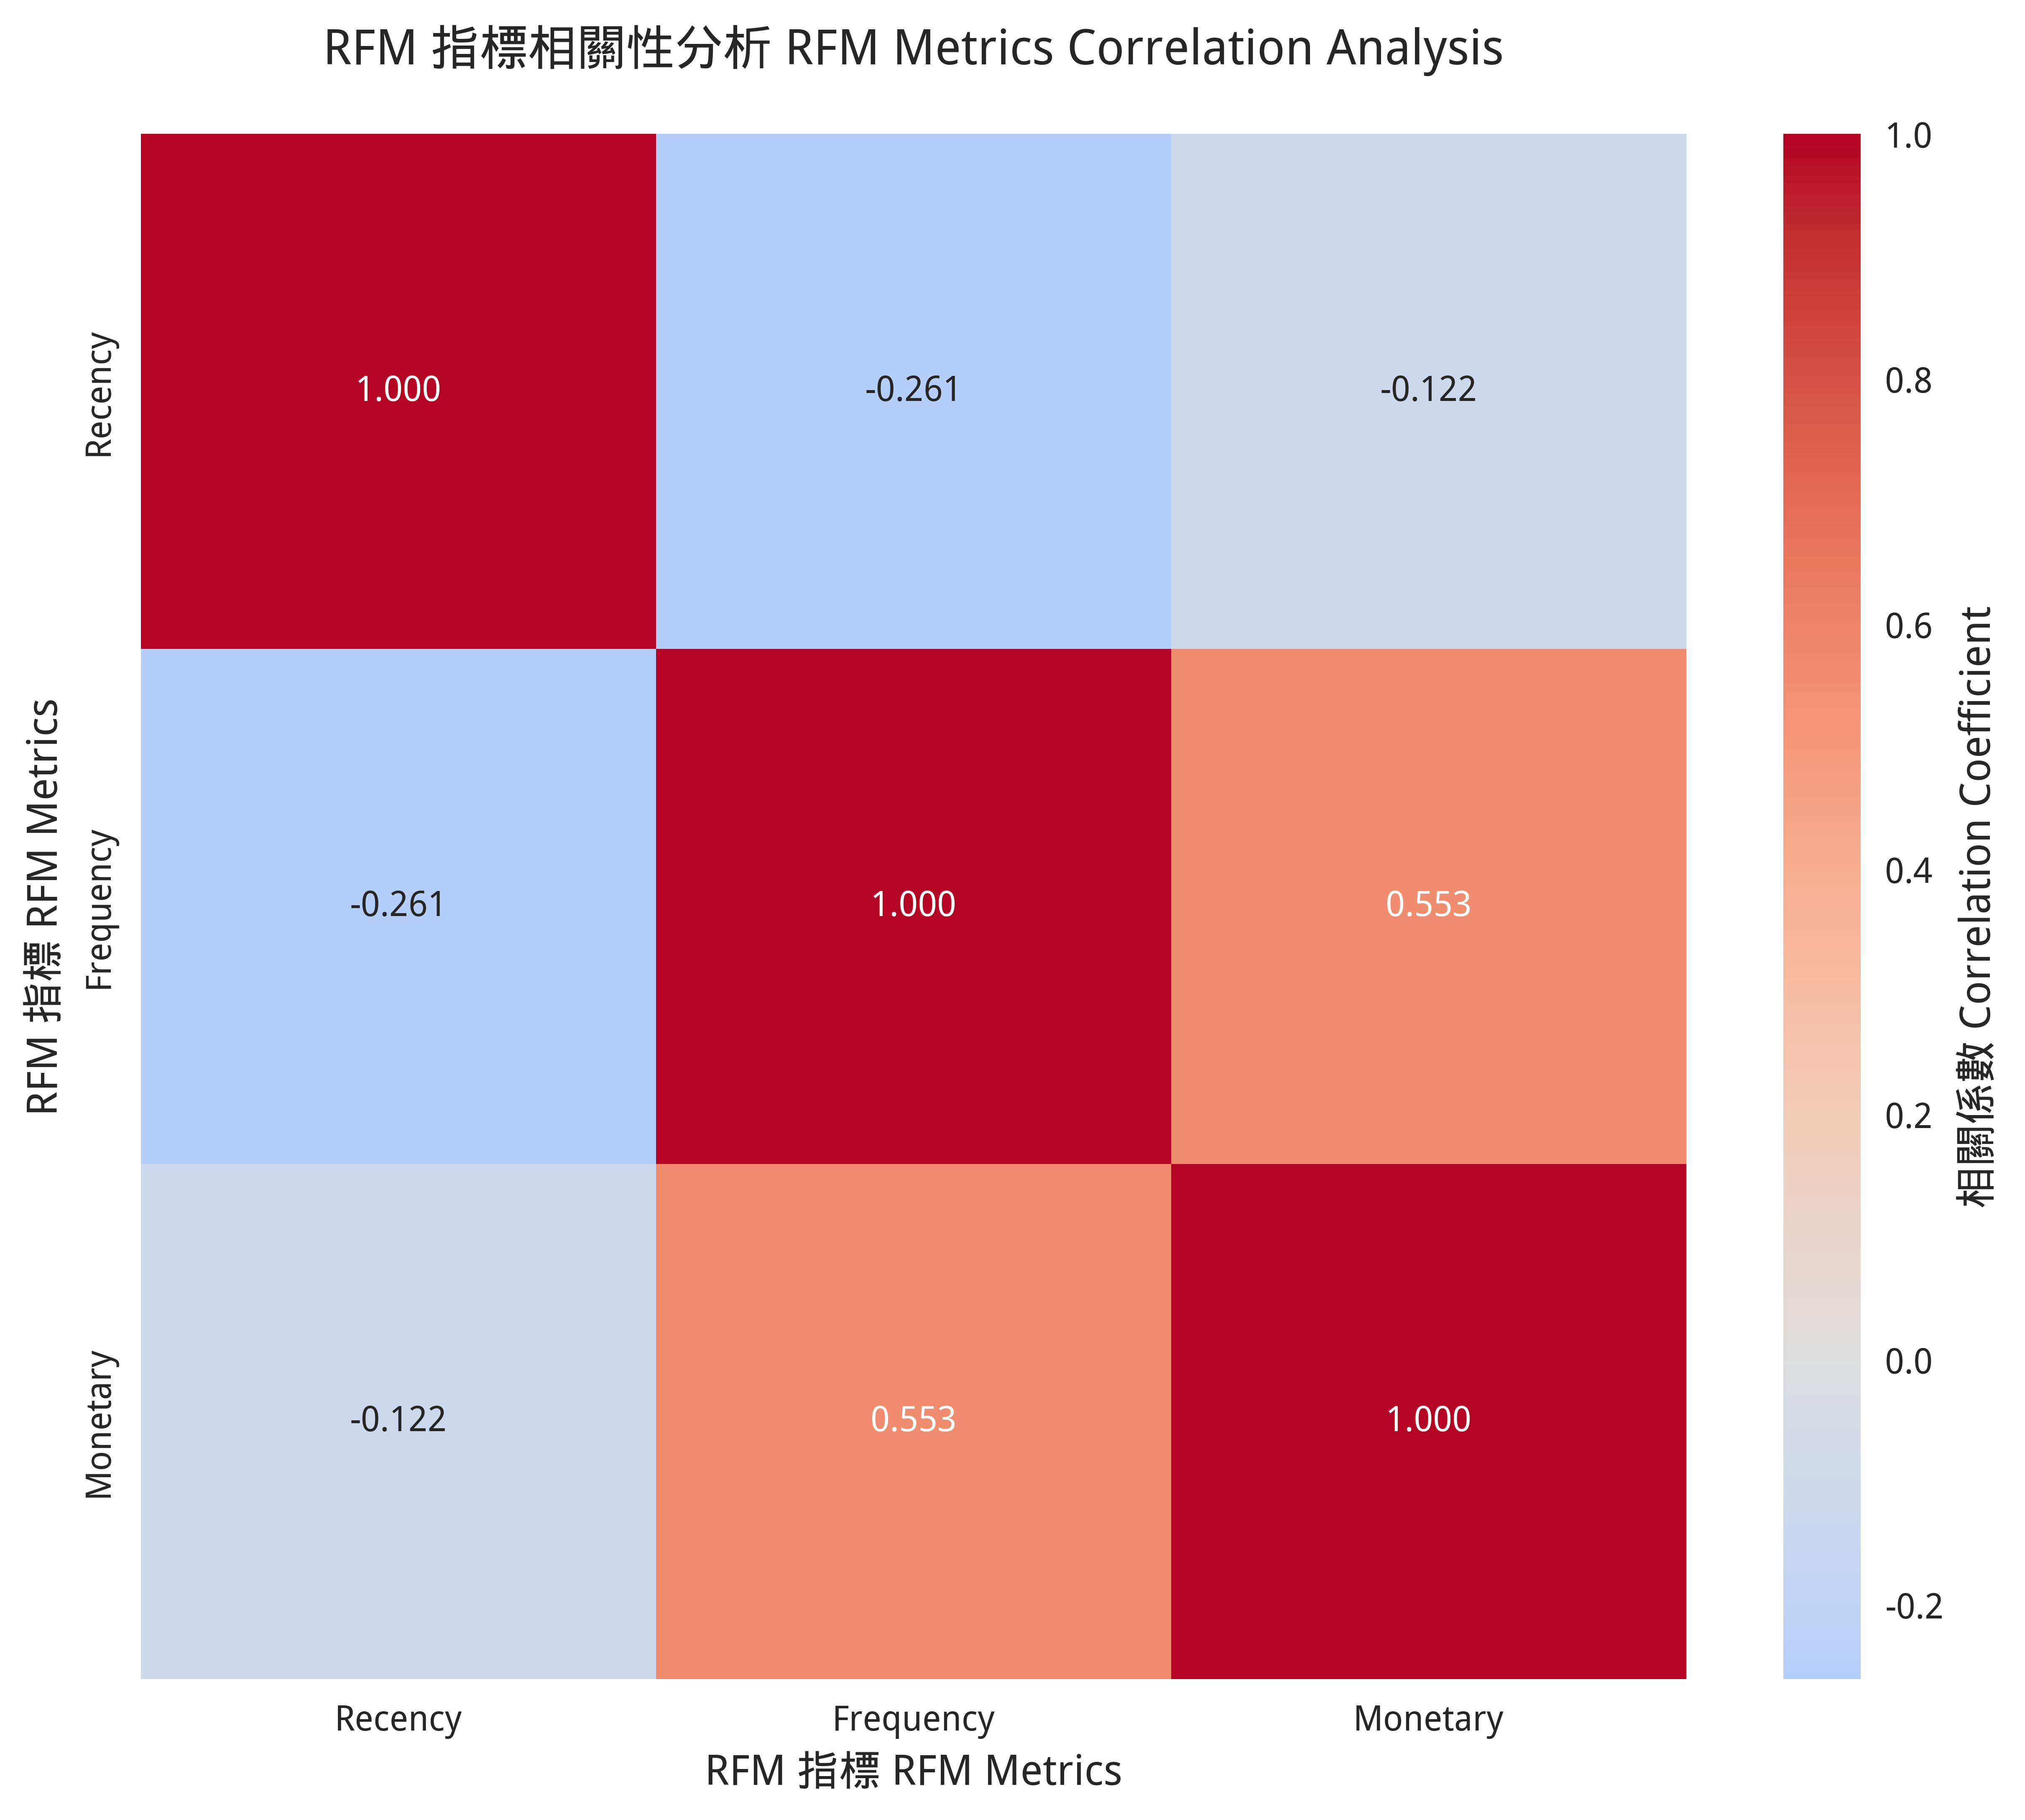


📊 相關係數矩陣 Correlation Matrix:


Recency  Frequency  Monetary
Recency      1.000     -0.261    -0.122
Frequency   -0.261      1.000     0.553
Monetary    -0.122      0.553     1.000


💡 相關性洞察 Correlation Insights:
• Frequency vs Monetary: 0.553 - 購買頻率與金額呈正相關
• Recency vs Frequency: -0.261 - 近期性與頻率呈負相關
• Recency vs Monetary: -0.122 - 近期性與金額呈負相關


In [22]:
# RFM 相關性分析
print("🔗 RFM 指標相關性分析 RFM Metrics Correlation Analysis")
print("=" * 60)

# 繪製相關性熱力圖
visualizer.plot_rfm_correlation(rfm_data, save_path=plots_dir)

# 計算相關係數
correlation_matrix = rfm_data[['Recency', 'Frequency', 'Monetary']].corr()

print("\n📊 相關係數矩陣 Correlation Matrix:")
display(correlation_matrix.round(3))

print("\n💡 相關性洞察 Correlation Insights:")
print(f"• Frequency vs Monetary: {correlation_matrix.loc['Frequency', 'Monetary']:.3f} - 購買頻率與金額呈正相關")
print(f"• Recency vs Frequency: {correlation_matrix.loc['Recency', 'Frequency']:.3f} - 近期性與頻率呈負相關")
print(f"• Recency vs Monetary: {correlation_matrix.loc['Recency', 'Monetary']:.3f} - 近期性與金額呈負相關")

## 👥 客戶分群分析
## Customer Segmentation Analysis

### 🎯 分群策略 Segmentation Strategy

基於 RFM 分數，我們將客戶分為以下群體：

| 分群名稱 | RFM 特徵 | 商業特徵 | 行銷策略 |
|---------|----------|----------|----------|
| 🌟 Champions | 高R高F高M | 最佳客戶 | VIP服務、個人化體驗 |
| 💎 Loyal Customers | 中R高F高M | 忠實客戶 | 忠誠度計畫、升級服務 |
| 🎯 Potential Loyalists | 高R中F中M | 潛力客戶 | 增加購買頻率 |
| 🆕 New Customers | 高R低F低M | 新客戶 | 歡迎體驗、引導購買 |
| 💰 Big Spenders | 中R低F高M | 大額消費者 | 高價值商品推薦 |
| ⚠️ At Risk | 低R高F高M | 風險客戶 | 挽回活動、特別優惠 |
| 🔄 Cannot Lose Them | 低R高F高M | 重要流失客戶 | 緊急挽回措施 |
| 😴 Hibernating | 低R低F低M | 休眠客戶 | 重新激活活動 |
| 👋 Lost | 極低R低F低M | 已流失客戶 | 成本效益評估 |

In [23]:
# 進行客戶分群
print("👥 開始客戶分群分析 Starting Customer Segmentation")
print("=" * 60)

segmented_data = pipeline.segment_customers(rfm_bins=5)

print(f"\n✅ 客戶分群完成 Customer segmentation completed")
print(f"📊 分群數量 Number of segments: {segmented_data['Customer_Segment'].nunique()}")

# 分群統計
segment_summary = segmented_data['Customer_Segment'].value_counts().sort_values(ascending=False)

print("\n📊 客戶分群分布 Customer Segment Distribution:")
for segment, count in segment_summary.items():
    percentage = (count / len(segmented_data)) * 100
    print(f"   {segment}: {count:,} 位客戶 ({percentage:.1f}%)")

👥 開始客戶分群分析 Starting Customer Segmentation


[32m2025-05-31 20:43:35[0m | [1mINFO    [0m | [36mcustomer_segmentation.utils.logger[0m:[36mwrapper[0m:[36m143[0m |
[1m開始執行 Starting execution: segment_customers[0m

[32m2025-05-31 20:43:35[0m | [1mINFO    [0m | 
[36mcustomer_segmentation.pipeline[0m:[36msegment_customers[0m:[36m152[0m | [1m👥 開始客戶分群 Starting customer 
segmentation[0m

🏆 計算 RFM 分數 Calculating RFM scores...
✅ RFM 分數計算完成 RFM scores calculated!
👥 進行客戶分群 Customer segmentation...
✅ 客戶分群完成 Customer segmentation completed!
💰 計算客戶終身價值 Calculating Customer Lifetime Value...
✅ 客戶終身價值計算完成 CLV calculation completed!


[32m2025-05-31 20:43:35[0m | [1mINFO    [0m | 
[36mcustomer_segmentation.pipeline[0m:[36msegment_customers[0m:[36m168[0m | [1m✅ 客戶分群完成 Customer 
segmentation completed: 9 segments[0m

[32m2025-05-31 20:43:35[0m | [1mINFO    [0m | [36mcustomer_segmentation.utils.logger[0m:[36mwrapper[0m:[36m148[0m |
[1m執行完成 Execution completed: segment_customers (耗時 Time: 0.03s)[0m


✅ 客戶分群完成 Customer segmentation completed
📊 分群數量 Number of segments: 9

📊 客戶分群分布 Customer Segment Distribution:
   Champions: 957 位客戶 (22.1%)
   Potential Loyalists: 727 位客戶 (16.8%)
   Hibernating: 670 位客戶 (15.4%)
   Need Attention: 547 位客戶 (12.6%)
   Loyal Customers: 453 位客戶 (10.4%)
   About to Sleep: 324 位客戶 (7.5%)
   Lost: 291 位客戶 (6.7%)
   Promising: 193 位客戶 (4.4%)
   New Customers: 176 位客戶 (4.1%)


In [24]:
# 客戶分群視覺化
print("📊 客戶分群視覺化分析 Customer Segmentation Visualization")
print("=" * 60)

# 繪製客戶分群分析圖
visualizer.plot_customer_segments(segmented_data, save_path=plots_dir)

print("\n💡 分群分析洞察 Segmentation Insights:")
print("• Champions 和 Loyal Customers 是最有價值的客戶群體")
print("• At Risk 客戶需要立即關注，防止流失")
print("• New Customers 具有很大的成長潛力")
print("• Hibernating 客戶可透過重新激活活動喚醒")

📊 客戶分群視覺化分析 Customer Segmentation Visualization


[32m2025-05-31 20:43:36[0m | [1mINFO    [0m | 
[36mcustomer_segmentation.visualization.visualizer[0m:[36m_setup_chinese_fonts[0m:[36m81[0m | [1m✅ 使用中文字體 
Using Chinese font: WenQuanYi Micro Hei[0m

[32m2025-05-31 20:43:37[0m | [1mINFO    [0m | 
[36mcustomer_segmentation.visualization.visualizer[0m:[36mplot_customer_segments[0m:[36m301[0m | [1m👥 
客戶分群圖已儲存 Customer segments plot saved: ../plots[0m


💡 分群分析洞察 Segmentation Insights:
• Champions 和 Loyal Customers 是最有價值的客戶群體
• At Risk 客戶需要立即關注，防止流失
• New Customers 具有很大的成長潛力
• Hibernating 客戶可透過重新激活活動喚醒


## 📅 時間序列分析
## Time Series Analysis

In [25]:
# 時間序列分析
print("📅 時間序列分析 Time Series Analysis")
print("=" * 50)

# 繪製時間序列分析圖
visualizer.plot_time_series_analysis(cleaned_data, save_path=plots_dir)

print("\n💡 時間序列洞察 Time Series Insights:")
print("• 銷售額呈現明顯的季節性波動")
print("• 交易數量與銷售額趨勢基本一致")
print("• 新客戶獲取存在週期性模式")
print("• 平均訂單價值相對穩定")

📅 時間序列分析 Time Series Analysis


[32m2025-05-31 20:43:40[0m | [1mINFO    [0m | 
[36mcustomer_segmentation.visualization.visualizer[0m:[36m_setup_chinese_fonts[0m:[36m81[0m | [1m✅ 使用中文字體 
Using Chinese font: WenQuanYi Micro Hei[0m

[32m2025-05-31 20:43:40[0m | [1mINFO    [0m | 
[36mcustomer_segmentation.visualization.visualizer[0m:[36mplot_time_series_analysis[0m:[36m372[0m | [1m📅 
時間序列圖已儲存 Time series plot saved: ../plots[0m


💡 時間序列洞察 Time Series Insights:
• 銷售額呈現明顯的季節性波動
• 交易數量與銷售額趨勢基本一致
• 新客戶獲取存在週期性模式
• 平均訂單價值相對穩定


## 🌍 地理分析
## Geographic Analysis

🌍 地理分析 Geographic Analysis


[32m2025-05-31 20:43:43[0m | [1mINFO    [0m | 
[36mcustomer_segmentation.visualization.visualizer[0m:[36m_setup_chinese_fonts[0m:[36m81[0m | [1m✅ 使用中文字體 
Using Chinese font: WenQuanYi Micro Hei[0m

[32m2025-05-31 20:43:43[0m | [1mINFO    [0m | 
[36mcustomer_segmentation.visualization.visualizer[0m:[36mplot_geographic_analysis[0m:[36m420[0m | [1m🌍 
地理分析圖已儲存 Geographic analysis plot saved: ../plots[0m

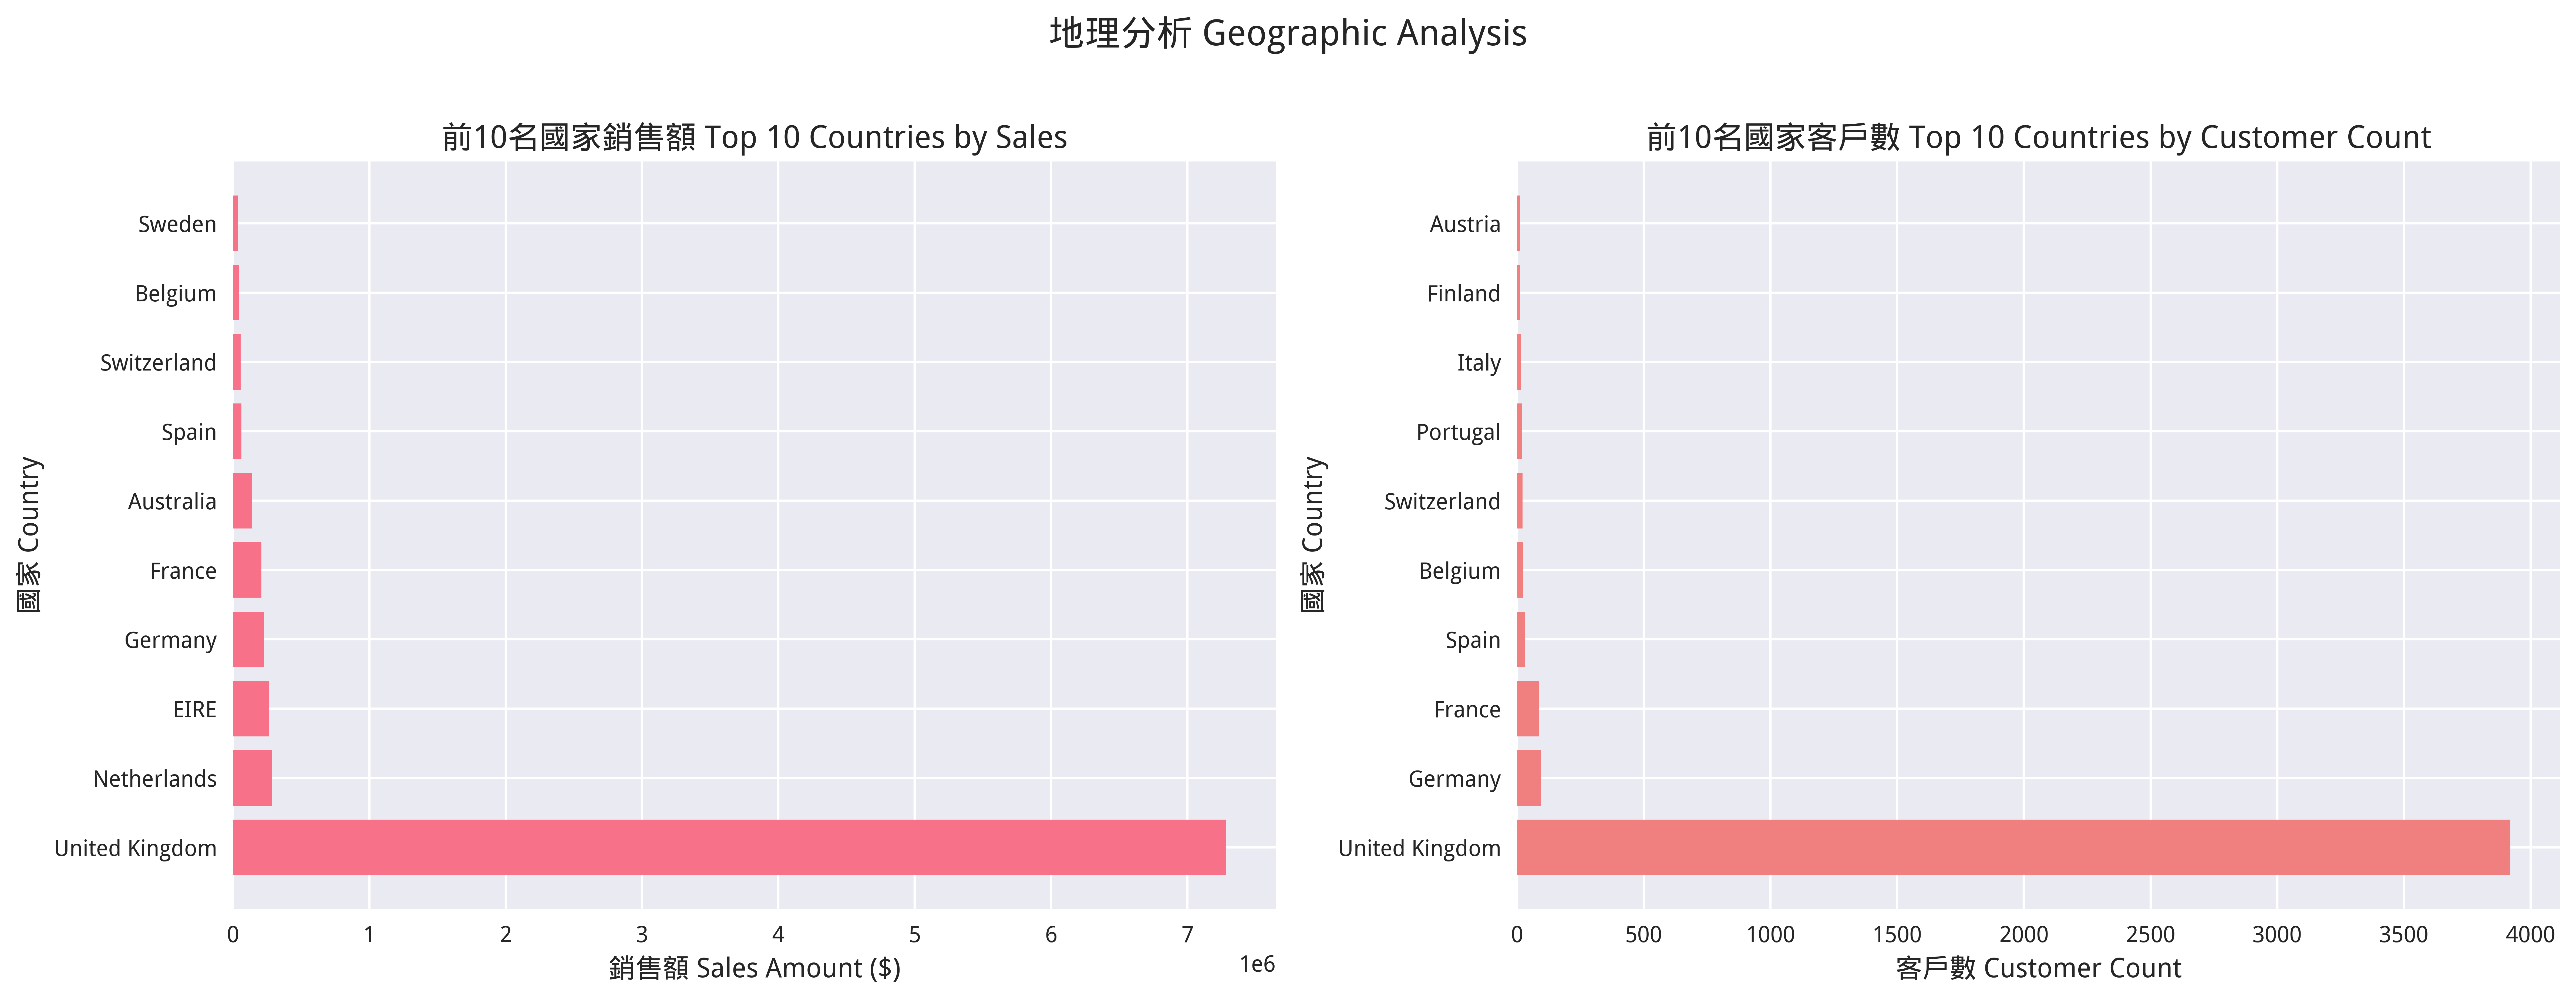


💡 地理分析洞察 Geographic Insights:
• 英國是最主要的市場，貢獻大部分營收
• 歐洲國家是主要的客戶來源
• 存在明顯的地理集中度
• 部分國家具有擴展潛力


In [26]:
# 地理分析
print("🌍 地理分析 Geographic Analysis")
print("=" * 50)

# 繪製地理分析圖
visualizer.plot_geographic_analysis(cleaned_data, save_path=plots_dir)

print("\n💡 地理分析洞察 Geographic Insights:")
print("• 英國是最主要的市場，貢獻大部分營收")
print("• 歐洲國家是主要的客戶來源")
print("• 存在明顯的地理集中度")
print("• 部分國家具有擴展潛力")

## 💡 業務洞察與建議
## Business Insights & Recommendations

In [27]:
# 生成業務洞察
print("💡 業務洞察分析 Business Insights Analysis")
print("=" * 60)

# 生成分析摘要
summary = pipeline.generate_analysis_summary()
insights = pipeline.get_business_insights()

# 資料概況
data_overview = summary['data_overview']
print("📊 資料概況 Data Overview:")
print(f"   • 原始資料筆數: {data_overview['original_records']:,}")
print(f"   • 清理後資料筆數: {data_overview['cleaned_records']:,}")
print(f"   • 資料保留率: {data_overview['retention_rate']:.1f}%")
print(f"   • 分析客戶數: {data_overview['customers_analyzed']:,}")

# RFM 統計
rfm_stats = summary['rfm_statistics']
print(f"\n🎯 RFM 統計 RFM Statistics:")
print(f"   • 平均 Recency: {rfm_stats['avg_recency']:.1f} 天")
print(f"   • 平均 Frequency: {rfm_stats['avg_frequency']:.1f} 次")
print(f"   • 平均 Monetary: ${rfm_stats['avg_monetary']:,.2f}")
print(f"   • 總營收: ${rfm_stats['total_revenue']:,.2f}")

# 分群結果
segmentation = summary['segmentation_results']
print(f"\n👥 客戶分群統計 Customer Segmentation:")
print(f"   • 分群數量: {segmentation['total_segments']}")

# 業務洞察
if insights:
    print(f"\n💡 關鍵業務洞察 Key Business Insights:")
    
    if 'champions' in insights:
        champions = insights['champions']
        print(f"   • Champions 客戶: {champions['count']:,} 位 ({champions['percentage']:.1f}%)")
        print(f"     貢獻營收: ${champions['revenue_contribution']:,.2f}")
    
    if 'at_risk' in insights:
        at_risk = insights['at_risk']
        print(f"   • 風險客戶: {at_risk['count']:,} 位 ({at_risk['percentage']:.1f}%)")
        print(f"     潛在損失: ${at_risk['potential_loss']:,.2f}")

💡 業務洞察分析 Business Insights Analysis
📊 資料概況 Data Overview:
   • 原始資料筆數: 541,909
   • 清理後資料筆數: 392,692
   • 資料保留率: 72.5%
   • 分析客戶數: 4,338

🎯 RFM 統計 RFM Statistics:
   • 平均 Recency: 92.5 天
   • 平均 Frequency: 4.3 次
   • 平均 Monetary: $2,048.69
   • 總營收: $8,887,208.89

👥 客戶分群統計 Customer Segmentation:
   • 分群數量: 9

💡 關鍵業務洞察 Key Business Insights:
   • Champions 客戶: 957 位 (22.1%)
     貢獻營收: $5,791,640.74


## 📊 結果匯出
## Export Results

In [28]:
# 匯出分析結果
exported_files = pipeline.export_results()

print("📁 匯出檔案 Exported Files:")
for file_type, file_path in exported_files.items():
    print(f"  • {file_type}: {file_path}")

print("\n✅ 客戶分群分析報告完成！Customer Segmentation Analysis Report Completed!")
print(f"📁 所有圖表已保存至: {plots_dir.absolute()}")

[32m2025-05-31 20:43:44[0m | [1mINFO    [0m | [36mcustomer_segmentation.utils.logger[0m:[36mwrapper[0m:[36m143[0m |
[1m開始執行 Starting execution: export_results[0m

[32m2025-05-31 20:43:44[0m | [1mINFO    [0m | 
[36mcustomer_segmentation.pipeline[0m:[36mexport_results[0m:[36m236[0m | [1m💾 匯出分析結果 Exporting results to: 
data/results[0m

[32m2025-05-31 20:43:45[0m | [1mINFO    [0m | 
[36mcustomer_segmentation.pipeline[0m:[36mexport_results[0m:[36m262[0m | [1m✅ 結果匯出完成 Results exported: 4 
files[0m

[32m2025-05-31 20:43:45[0m | [1mINFO    [0m | [36mcustomer_segmentation.utils.logger[0m:[36mwrapper[0m:[36m148[0m |
[1m執行完成 Execution completed: export_results (耗時 Time: 0.89s)[0m

📁 匯出檔案 Exported Files:
  • segmentation_results: data/results/customer_segmentation_results.csv
  • cleaned_data: data/results/cleaned_data.csv
  • rfm_data: data/results/rfm_data.csv
  • segment_summary: data/results/segment_summary.csv

✅ 客戶分群分析報告完成！Customer Segmentation Analysis Report Completed!
📁 所有圖表已保存至: /home/jimmy/AI_business_class/E-Commerce/notebooks/../plots
